In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings(action = 'ignore')
plt.style.use('seaborn')

In [4]:
data = pd.read_csv('Advertising.csv')
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
X = data.iloc[:,:3]
y = data.iloc[:,-1]

In [13]:
print(X.shape)
print(y.shape)

(200, 3)
(200,)


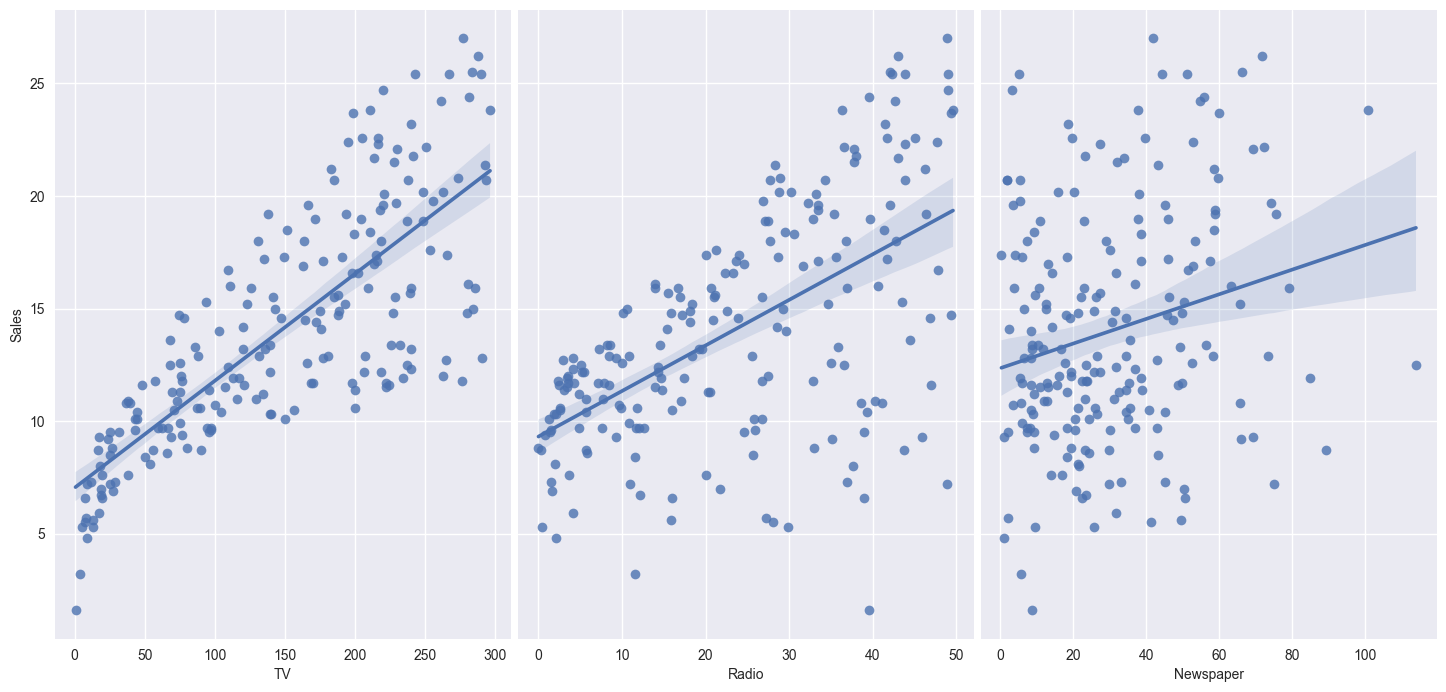

In [14]:
# fig = plt.figure(figsize = (5,4))
sns.pairplot(data, x_vars = ['TV','Radio','Newspaper'], y_vars = 'Sales', height = 7, aspect = 0.7, kind = 'reg')
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

In [34]:
X_train

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
155,4.1,11.6,5.7
156,93.9,43.5,50.5
157,149.8,1.3,24.3
158,11.7,36.9,45.2


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [17]:
# import the model from sklearn
# instantiate the model
# fit the model
# test the model


In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [19]:
reg.fit(X_train, y_train)

LinearRegression()

In [20]:
print(reg.coef_)
print(reg.intercept_)

[ 0.0472521   0.179922   -0.00094408]
2.9490110405821106


In [21]:
input_vals = X_train.iloc[0,:].values
wght = np.array(reg.coef_)

In [33]:
input_vals

array([230.1,  37.8,  69.2])

In [36]:
print((wght))

[ 0.0472521   0.179922   -0.00094408]


In [23]:
coef_mul = input_vals * wght
pred_val = coef_mul.sum() + reg.intercept_

In [35]:
coef_mul

array([10.87270715,  6.80105161, -0.06533016])

In [24]:
pred_val

20.55743963693512

In [37]:
y_pred =reg.predict(X_test)
y_pred

array([14.32760252, 13.3931802 , 15.08372563, 17.28887207, 11.126712  ,
       14.56130444, 10.53949868, 13.63802366, 17.31889273, 18.28391286,
        7.38133999, 14.43760126,  7.475535  , 12.17162591, 14.05724444,
       24.79183962, 20.10091117, 12.36147775, 16.4151118 , 12.55656227,
       10.80865053, 14.21930496,  6.6020951 , 24.20757492, 18.74560913,
       20.73166888,  9.89340209, 17.12546566, 18.96053303,  5.98759002,
       12.20478737,  8.45403738,  4.46959444, 18.38398588, 16.42220846,
        5.40672422,  8.2741292 , 12.97986443, 23.84393137, 15.4553381 ])

In [27]:
print(y_pred.shape)

(40,)


In [28]:
from sklearn.metrics import  r2_score
score = r2_score(y_pred, y_test)
print(score)

0.8911538972382789
